In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.linalg as la
import winsound

In [2]:
from fbpconvnet import *
from train import *

In [3]:
fbpcnn = fbpconvnet()

X_train, X_test, E_train, E_test = load_dataset(20, 5, which='ellipses')

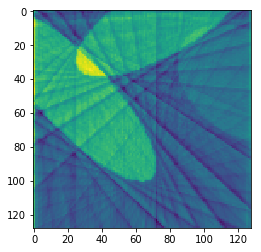

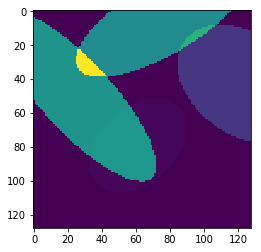

In [4]:
plt.figure(1);plt.imshow(X_train[0,:,:,0])
plt.figure(2);plt.imshow(E_train[0,:,:,0])

In [7]:
fbpcnn.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), 
              loss='mean_squared_error',#euclidean_loss,
#               loss=euclidean_loss,
              metrics=['mean_squared_error'])
#               metrics=[euclidean_loss])
fbpcnn.fit(X_train, E_train,
          batch_size=1,
          epochs=20)
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

Epoch 1/20
20/20 [==============================] - 3s 158ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2/20
20/20 [==============================] - 2s 114ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 3/20
20/20 [==============================] - 2s 116ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 4/20
20/20 [==============================] - 2s 115ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 5/20
20/20 [==============================] - 2s 114ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 6/20
20/20 [==============================] - 2s 115ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 7/20
20/20 [==============================] - 2s 115ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 8/20
20/20 [==============================] - 2s 115ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 9/20
20/20 [==============================] - 2s 116ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 10/2

In [6]:
X_recon = fbpcnn.predict(X_test)
test_loss, test_acc = fbpcnn.evaluate(X_recon, E_test)
print(test_loss, test_acc)

5/5 [==============================] - 0s 38ms/step
0.003952326253056526 0.003952299244701862


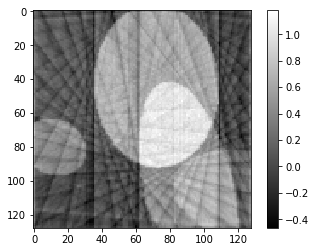

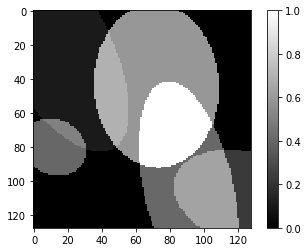

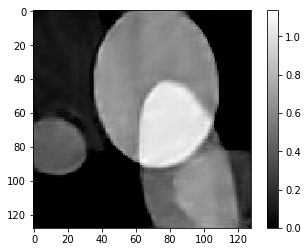

In [9]:
X_recon = fbpcnn.predict(X_train)
plt.figure(1);plt.imshow(X_train[6,:,:,0], cmap='gray');plt.colorbar()
plt.figure(2);plt.imshow(E_train[6,:,:,0], cmap='gray');plt.colorbar()
plt.figure(3);plt.imshow(X_recon[6,:,:,0], cmap='gray');plt.colorbar()

# X_recon_edit = (X_recon-1.5)*(X_recon>=1.5)
# plt.figure(3);plt.imshow(X_recon_edit[1,:,:,0], cmap='gray');plt.colorbar()

In [8]:
la.norm(E_train[0,:,:,0].flatten() - X_train[0,:,:,0].flatten())

12.838947219490471

In [9]:
la.norm(E_train[0,:,:,0].flatten() - X_recon[0,:,:,0].flatten())

6.809312540477602

In [10]:
X_recon = fbpcnn.predict(X_test)

In [11]:
la.norm(E_test[0,:,:,0].flatten() - X_test[0,:,:,0].flatten())

16.141471760904203

In [12]:
la.norm(E_test[0,:,:,0].flatten() - X_recon[0,:,:,0].flatten())

6.1337109559349

In [13]:
sess = tf.InteractiveSession()
print(euclidean_loss(X_recon, E_train).eval())
sess.close()

ValueError: operands could not be broadcast together with shapes (20,128,128,1) (5,128,128,1) 

In [11]:
np.amin(X_train)

-0.744609055695334

In [12]:
np.amax(E_train)

7.417872827639148

In [7]:
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

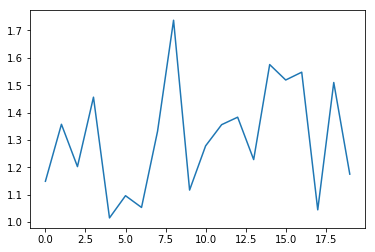

In [7]:
maxs = np.zeros(X_train.shape[0])
mins = np.zeros(X_train.shape[0])

for i in range(X_train.shape[0]):
    maxs[i] = np.amax(X_train[i,:,:,:])
    mins[i] = np.amin(X_train[i,:,:,:])
    
plt.plot(maxs-mins)